# Hydrogen Atom Problem - Radial Part

In [1]:
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt

- CntDiffEigVal
- SchrNorm

## Propagator with central difference calculation
Function: **`prop_central_diff(pr, p, q, r, x, y, dx)`**

$$ a = 2 + h^2 q(\lambda, x_{i-1}) $$
$$ b = -\left(1 + \frac{h}{2}\, p(x_{i-1}) \right) $$
$$ c = h^2 r(x_{i-1}) $$
$$ d = 1 - \frac{h}{2}\, p(x_{i-1}) $$
$$ y(x_i) = \frac{a}{d} \,y(x_{i-1}) + \frac{b}{d}\, y(x_{i-2}) + \frac{c}{d} $$

In [2]:
def prop_central_diff(pr, p, q, r, x, y, dx):
    '''
    y'' + py' + qy + r = 0
    p = p(x), q = q(lb, x), r = r(x)
    '''
    N = len(x)
    yy = [y[i] for i in range(N)]
    for i in range(2, N):
        a = 2 + dx**2 *q(pr, x[i-1])
        b = -(1 + dx/2 *p(x[i-1]))
        c = dx**2 *r(x[i-1])
        d = 1 - dx/2 *p(x[i-1])
        yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d
    return yy

## Determination eigenvalue and eigenfunction
Function: **`center_diff_eigval(pr_min, pr_max, p, q, r, x0, y0, xN, yN, y1, dx, nodes, max_itr)`**

In [3]:
def center_diff_eigval(pr_min, pr_max, p, q, r, x0, y0, xN, yN, y1, dx, nodes, max_itr):
    '''
    x0, y0 - left boundary condition
    xN, yN - right boundary condition
    y1 - estimation of solution at the next point after left boundary (y0)
    '''
    N = int((xN -x0)/dx)
    dx = (xN -x0)/N
    x = [x0 +i*dx for i in range(N+1)]
    y = [0 for i in range(N+1)]
    y[0], y[1], y[N] = y0, y1, yN
    itr = 0
    tolr = 1e-6
    while abs(pr_max - pr_min) >  tolr and itr < max_itr:
        pr = 0.5 *(pr_min + pr_max)  # bisection method
        yy = prop_central_diff(pr, p, q, r, x, y, dx)
        cnt = 0  # count
        for i in range(1, N-2):
            if yy[i]*yy[i+1] < 0:
                cnt += 1
        if cnt > nodes:
            pr_max = pr
        elif cnt < nodes:
            pr_min = pr
        else:
            if yy[N-1] > yN:
                pr_min = pr
            elif yy[N-1] < yN:
                pr_max = pr
            itr += 1  # maybe not in line
    if itr < max_itr:
        return pr, x, yy
    else:
        return None, None, None

## Normalization

In [4]:
def psiNorm(psi, dx):
    N = len(psi)
    psi2 = [psi[i]**2 for i in range(N)]
    psi2arr = np.array(psi2)
    psimod2 = np.sum(psi2arr*dx)
    norm_psi = np.array(psi)/(psimod2)**0.5
    return norm_psi

In [5]:
arr2 = np.arange(2, 12, 1e-2)
arr2n = psiNorm(arr2, 1e-2)
np.sum(arr2n**2 *1e-2)

1.0

## Radial part solution
$$ \frac{d^2R}{dr^2} -\frac{2}{r} \frac{dR}{dr} + \frac{2m}{\hbar^2} (E-V(r)) R(r) = 0 $$

C:\Users\suman\AppData\Local\Temp\ipykernel_1028\2628580618.py:19: RuntimeWarning: overflow encountered in double_scalars
  if yy[i]*yy[i+1] < 0:
C:\Users\suman\AppData\Local\Temp\ipykernel_1028\2116218444.py:13: RuntimeWarning: overflow encountered in double_scalars
  yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d
C:\Users\suman\AppData\Local\Temp\ipykernel_1028\2116218444.py:13: RuntimeWarning: invalid value encountered in double_scalars
  yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d


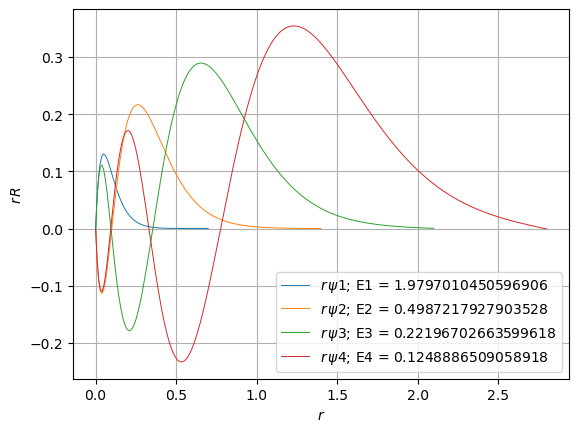

In [6]:
hcut, m, e2 = 0.1, 1, 0.2
mh2 = 2*m/hcut**2

def V(e2, r):
    return e2/r
def p(r):
    return -2/r
def q(E, r):
    return mh2 *(E - V(e2, r))
def rfn(r):
    return 0

dr = 1e-2
mxitr = 1000
r0, psi0, rN, psiN = 1e-6, 0, np.arange(1,5)*0.7, 0

for nodesn in range(4):
    Emn, Emx = V(e2, r0), V(e2, rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        rpsi = r*psi
        plt.plot(r, rpsi, label=f'$r\,\psi{nodesn+1}$; E{nodesn+1} = {E}', lw=0.7)
plt.xlabel('$r$')
plt.ylabel('$r\,R$')
plt.legend()
plt.grid()
plt.show()